# Credit Card Fraud Detection

The problem statement for this project is to predict fraudulent credit card transactions with the help of machine learning models.
we will analyze the customer-level data which has been collected and
analyzed during a research collaboration of World line and the Machine Learning Group
The dataset is taken from the Kaggle website and it has a total of 2,84,807 transactions, out of which 492 are fraudulent.

The final objective is to find
and stop those kind of fraud transactions by applying a suitable machine learningalgorithm using the given data set.

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Libraries

In [54]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")


In [55]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from scipy import interp
import itertools
import random

In [56]:
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_seq_items',None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

## Exploratory Data Analysis

In [57]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
df.shape

(284807, 31)

In [14]:
#observe the different feature type present in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [15]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [69]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Checking the distribution of our classes

In [8]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100


In [10]:
print (classes,normal_share,fraud_share)

0    284315
1       492
Name: Class, dtype: int64 99.82725143693798 0.1727485630620034


In [13]:
print(" normal_share: ",round((normal_share),2))
print(" fraud_share : ",round((fraud_share),2))

 normal_share:  99.83
 fraud_share :  0.17


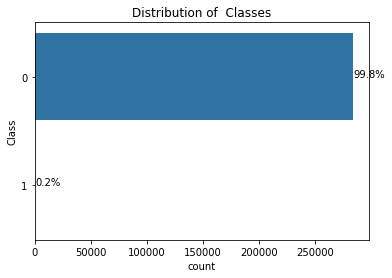

In [9]:
# Creating a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

ax = sns.countplot(y="Class", data=df)
plt.title('Distribution of  Classes')
plt.xlabel('count')

total = len(df['Class'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()


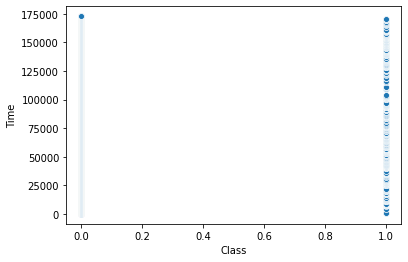

In [13]:
# Create a scatter plot to observe the distribution of classes with time

sns.scatterplot(data=df, x="Class", y="Time")

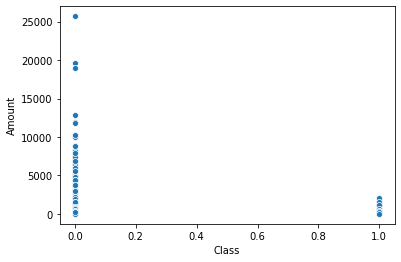

In [14]:
# Create a scatter plot to observe the distribution of classes with Amount

sns.scatterplot(data=df, x="Class", y="Amount")

In [10]:
fraud = df[df.Class == 1]
non_fraud = df[df.Class == 0]

Text(0, 0.5, 'Frequency')

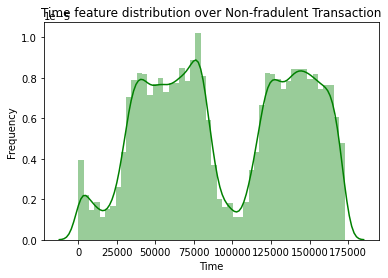

In [11]:
sns.distplot(non_fraud.Time, color='g')
plt.title("Time feature distribution over Non-fradulent Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

- We can see the distribution of Time over Non-fradulent Transactions, there are 2 peaks in the distribution and nothing unusual.

Text(0, 0.5, 'Frequency')

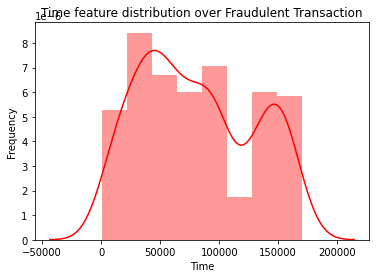

In [12]:
sns.distplot(fraud.Time, color='r')
plt.title("Time feature distribution over Fraudulent Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

- We can see the distribution of Time over Fraudulent Transactions,  it is a normal distribution and nothing unusual.

Text(0, 0.5, 'Frequency')

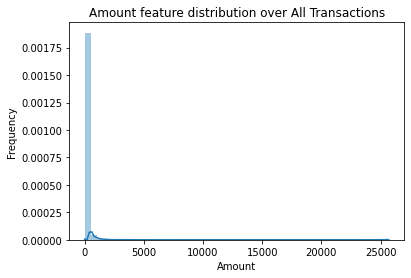

In [15]:
sns.distplot(df.Amount)
plt.title("Amount feature distribution over All Transactions")
plt.xlabel("Amount")
plt.ylabel("Frequency")

- The Amount column is highly skewed, hence using logarithmic scale to take care of skewness


In [13]:
df['Amount'] = np.log(df['Amount']+0.1)

Text(0, 0.5, 'Frequency')

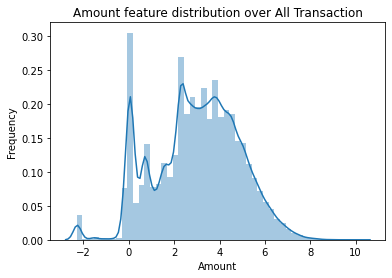

In [19]:
sns.distplot(df.Amount)
plt.title("Amount feature distribution over All Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

In [14]:
# Dropping unnecessary columns

df = df.drop(['Time'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008767,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.026042,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936903,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.817051,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.249780,0


## Splitting the data into Train & Test data

In [15]:
y = df['Class']
X = df.drop(['Class'],axis = 1)

In [16]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [17]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
379
113


## Plotting the distribution of a variables

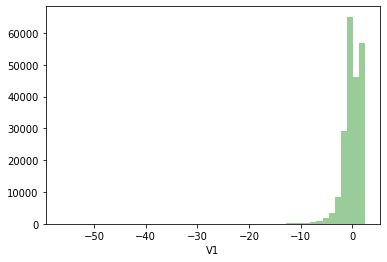

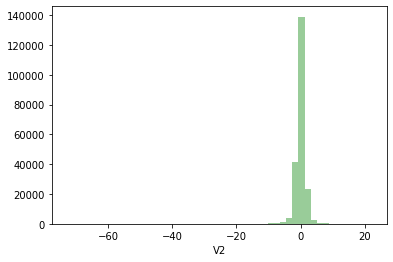

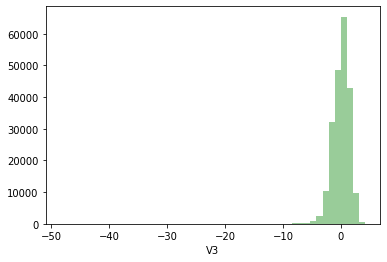

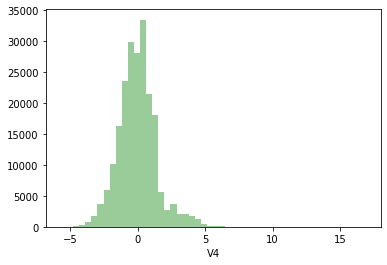

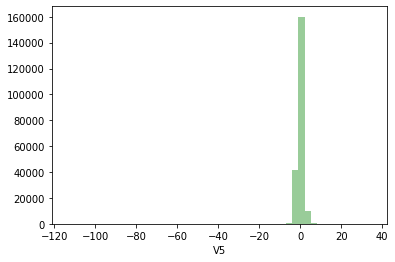

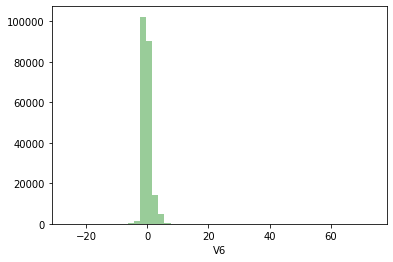

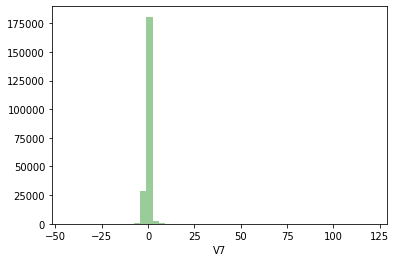

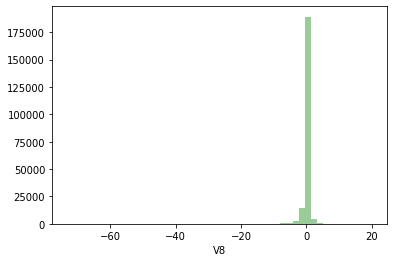

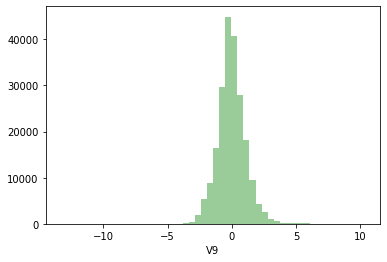

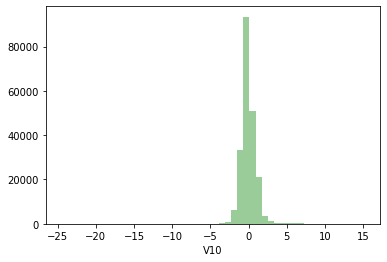

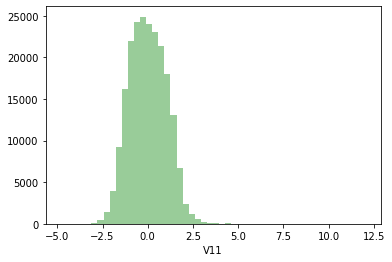

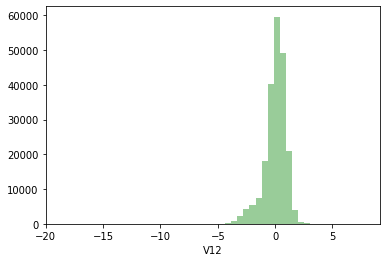

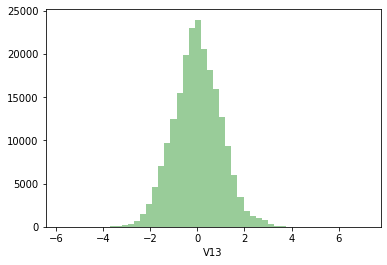

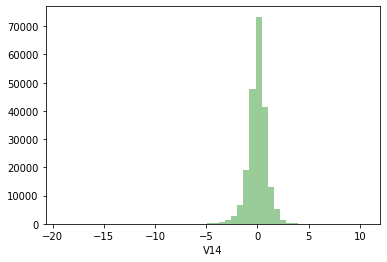

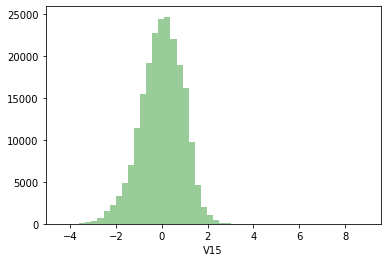

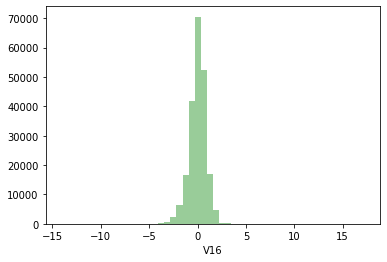

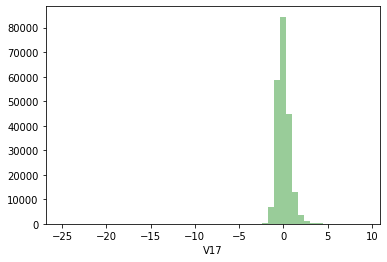

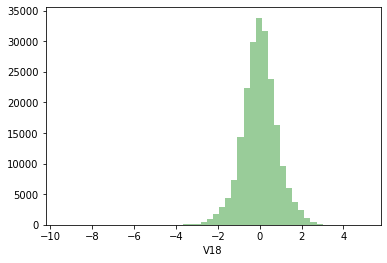

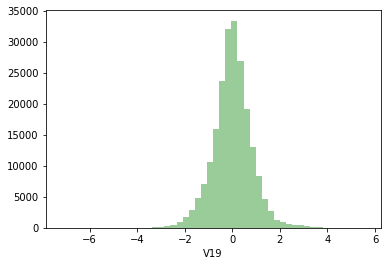

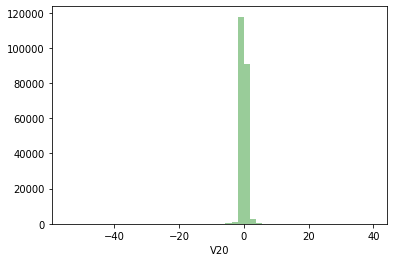

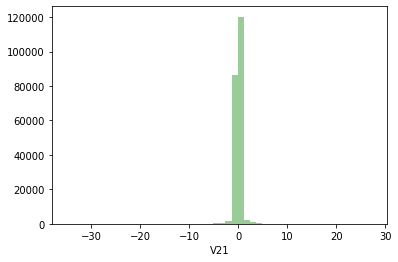

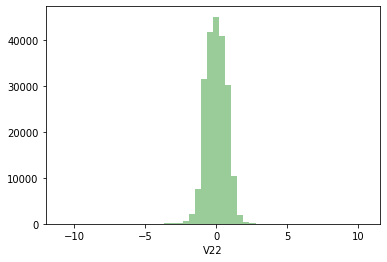

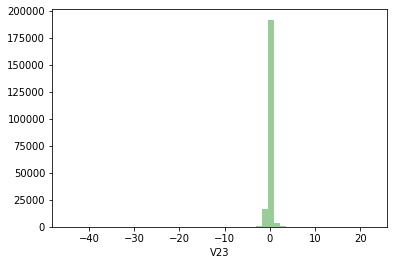

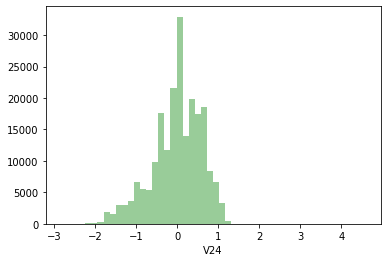

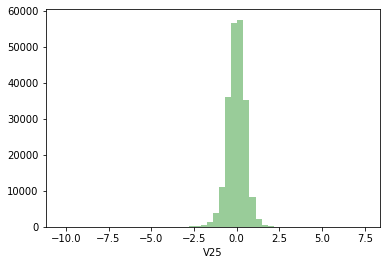

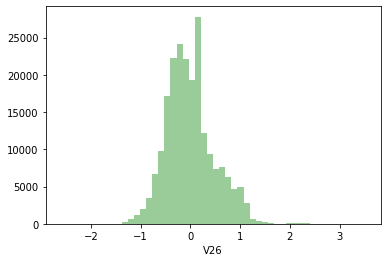

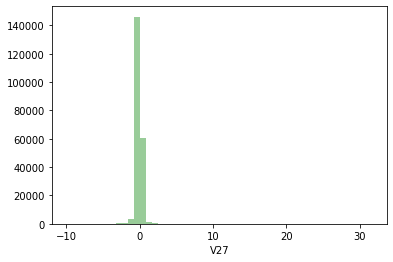

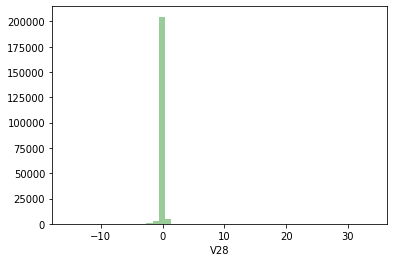

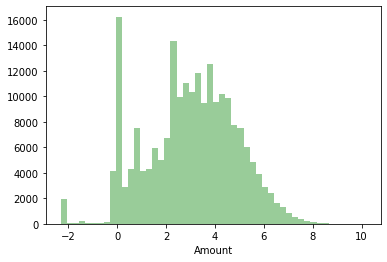

In [24]:
# plotting histogram for the variables from dataset to check the skewness

for col in X_train.select_dtypes('float'):
    plt.figure()
    sns.distplot(X_train[col],kde=False, color='Green')


Using the <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [18]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer(copy=False)
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

In [19]:
X_train = pd.DataFrame(data=X_train_pt, columns=X.columns)
X_test = pd.DataFrame(data=X_test_pt, columns=X.columns)
print(y_train.shape)
print(y_test.shape)

(213605,)
(71202,)


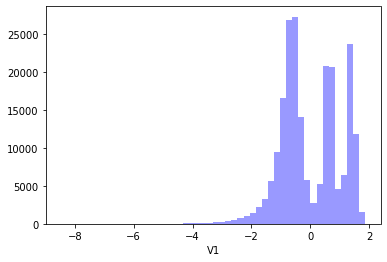

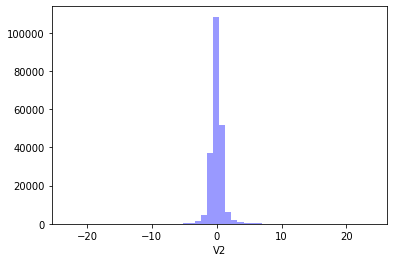

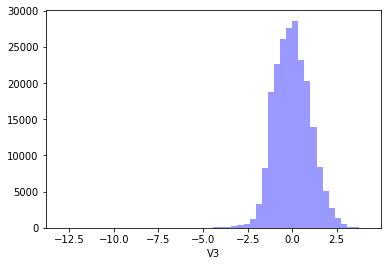

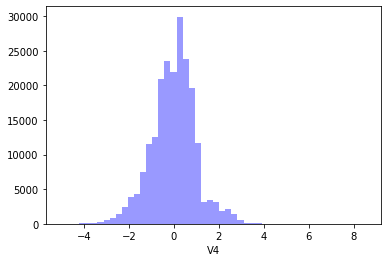

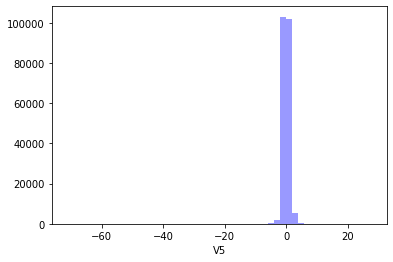

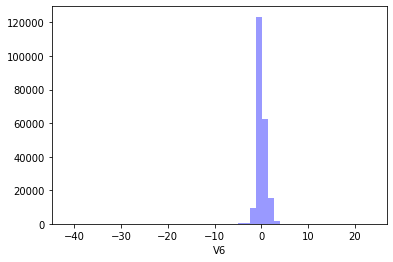

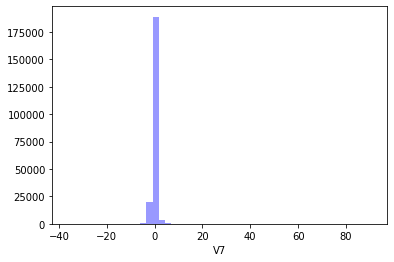

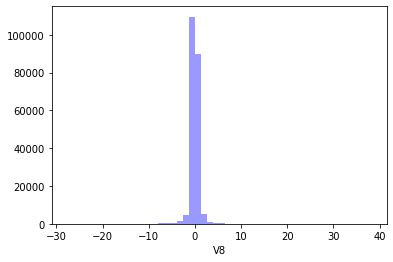

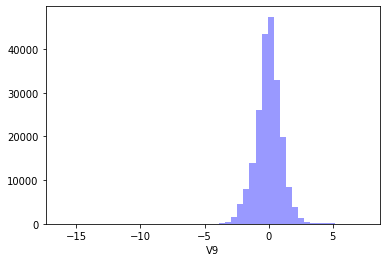

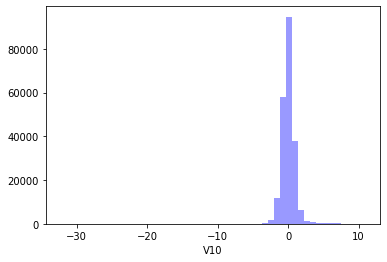

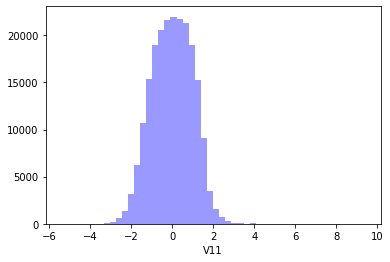

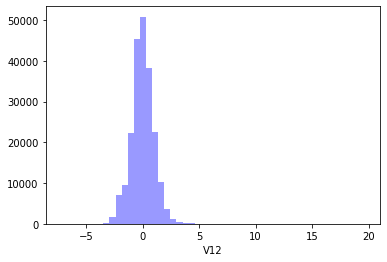

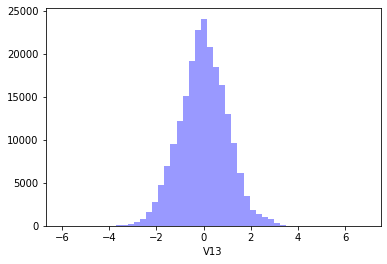

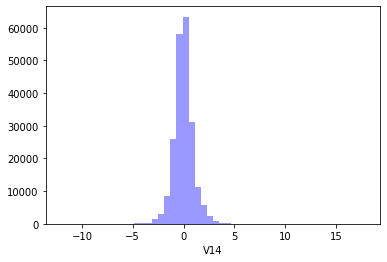

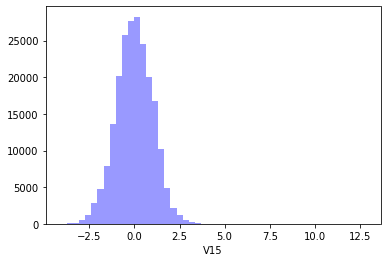

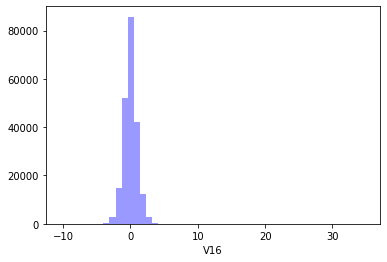

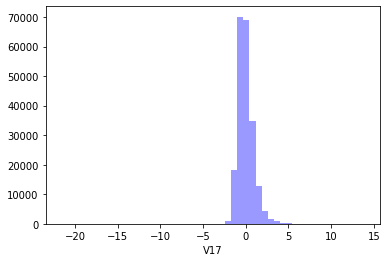

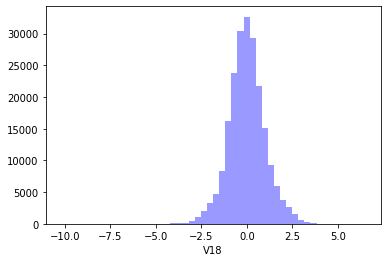

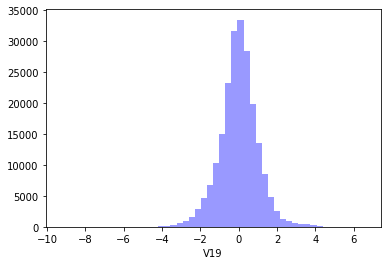

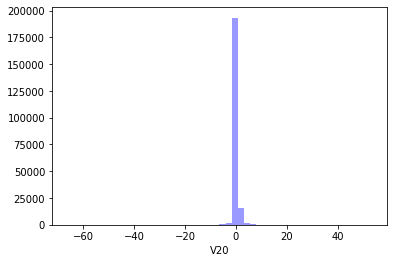

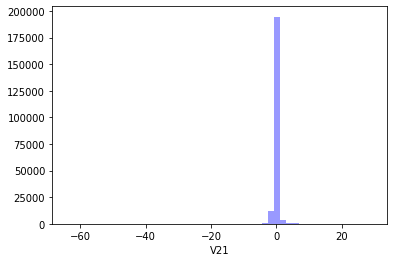

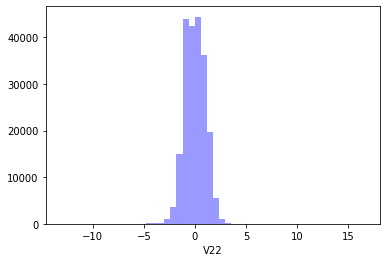

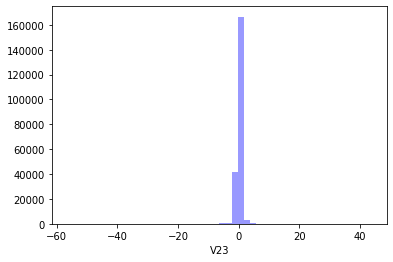

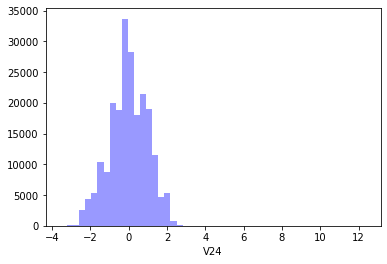

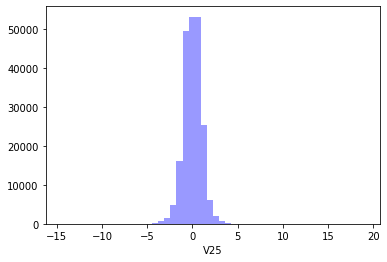

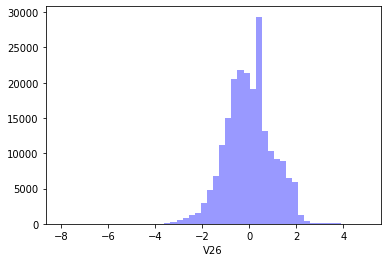

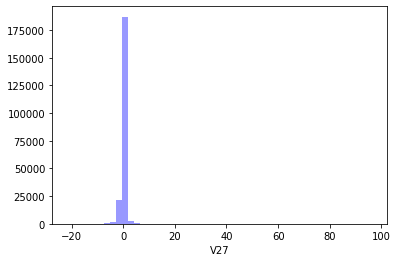

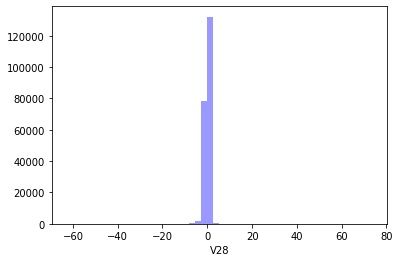

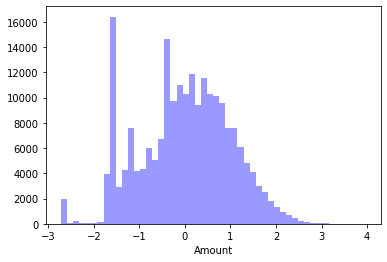

In [25]:
# plotting the histogram of variables from the dataset to check the results, post transformation 

for col in X_train.select_dtypes('float'):
    #print(col)
    plt.figure()
    sns.distplot(X_train[col],kde=False, color='Blue')

# Model Building - Below models are being used for this project (Imbalanced Data)
- Logistic Regression
- Random Forest
- XGBoost


## Stratified KFOLD

In [20]:
cv1=StratifiedKFold(n_splits=4, shuffle=True, random_state=33)
feature=X
target=y
for train_index, test_index in cv1.split(feature, target):

    X_train_cv = feature.iloc[train_index]
    X_test_cv = feature.iloc[test_index]
    y_train_cv = target.iloc[train_index]
    y_test_cv = target.iloc[test_index]
X_train_cv.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008767
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.026042
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.817051
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,3.711130
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,4.535820


In [21]:
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer(copy=False)
pt.fit(X_train_cv)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train_cv)    ## Then apply on all data
X_test_pt = pt.transform(X_test_cv)

In [22]:
X_train_cv = pd.DataFrame(data=X_train_pt, columns=X.columns)
X_test_cv = pd.DataFrame(data=X_test_pt, columns=X.columns)

## LOGISTIC REGRESSION

In [58]:
# fit model
lr=LogisticRegression()
lr.fit(X_train, y_train)

# check score on train data
lr.score(X_train, y_train)


0.9992509538634395

In [59]:
# predict churn on test data
y_pred = lr.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = lr.predict_proba(X_test)[:, 1]
print("ROC-AUC:\t",roc_auc_score(y_test, y_pred_prob))

[[71075    14]
 [   41    72]]
Sensitivity: 	0.64
Specificity: 	1.0
ROC-AUC:	 0.9794573846544348


## Logistic Regeression with hyperparameter tuning and K-fold sampling

In [42]:
# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
model=LogisticRegression()

penalty = ['l1', 'l2']
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
params = dict(C=c_values,penalty=penalty)

# create gridsearch object
model = RandomizedSearchCV(estimator=model, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [43]:
model.fit(X_train_cv,y_train_cv)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   14.2s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
          

In [71]:
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9478770280862602
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [74]:
lr0 = LogisticRegression(C=0.01, penalty='l2', random_state=0,)
lr0.fit(X_train_cv,y_train_cv)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
# predict churn on train data
y_pred = lr0.predict(X_train_cv)

# create onfusion matrix
cm = confusion_matrix(y_train_cv, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_cv, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = lr0.predict_proba(X_train_cv)[:, 1]
print("AUC:\t", round(roc_auc_score(y_train_cv, y_pred_prob),5))

[[213205     32]
 [   146    223]]
Sensitivity: 	0.6
Specificity: 	1.0
AUC:	 0.98231


In [76]:
# predict churn on test data
y_pred = lr0.predict(X_test_cv)

# create onfusion matrix
cm = confusion_matrix(y_test_cv, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_cv, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = lr0.predict_proba(X_test_cv)[:, 1]
print("AUC:\t", round(roc_auc_score(y_test_cv, y_pred_prob),5))

[[71073     5]
 [   61    62]]
Sensitivity: 	0.5
Specificity: 	1.0
AUC:	 0.98236


## RANDOM FOREST

In [60]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
y_pred = random_forest.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = random_forest.predict_proba(X_test)[:, 1]

print("AUC-ROC:\t",roc_auc_score(y_test, y_pred_prob))

[[71084     5]
 [   25    88]]
Sensitivity: 	0.78
Specificity: 	1.0
AUC-ROC:	 0.9543390517458048


## Random Forest with Hyperparameter Tuning and Stratified K-Fold Sampling

In [62]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier()

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create gridsearch object
model = GridSearchCV(estimator=forest,param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [63]:
model.fit(X_train_cv, y_train_cv)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 40.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [64]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9478770280862602
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [66]:
# random forest model on train data
max_features = int(round(np.sqrt(X_train_cv.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=0.4,criterion = 'gini', oob_score=True, random_state=4, verbose=1)

5


In [67]:
rf_model.fit(X_train_cv, y_train_cv)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.0min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=4, verbose=1,
                       warm_start=False)

In [68]:
# predict churn on train data
y_pred = rf_model.predict(X_train_cv)

# create onfusion matrix
cm = confusion_matrix(y_train_cv, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_cv, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_train)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_train, y_pred_prob),3))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[213237      0]
 [     0    369]]
Sensitivity: 	1.0
Specificity: 	1.0
ROC:    	 0.985


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished


In [69]:
# predict churn on test data
y_pred = rf_model.predict(X_test_cv)

# create onfusion matrix
cm = confusion_matrix(y_test_cv, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_cv, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),3))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[71070     8]
 [   27    96]]
Sensitivity: 	0.78
Specificity: 	1.0
ROC:    	 0.991


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


## XGBoost

In [42]:
from xgboost import XGBClassifier

In [30]:
xgboost=XGBClassifier()
xgboost.fit(X_train,y_train)
print('Accuracy of XGB on the testing dataset is :{:.3f}'.format(xgboost.score(X_test,y_test)))

Accuracy of XGB on the testing dataset is :1.000


In [31]:
y_pred = xgboost.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = xgboost.predict_proba(X_test)[:, 1]
print("AUC-ROC:\t",roc_auc_score(y_test, y_pred_prob))

[[71080     9]
 [   23    90]]
Sensitivity: 	0.8
Specificity: 	1.0
AUC-ROC:	 0.9798635189567309


In [32]:
from sklearn.model_selection import RandomizedSearchCV
#XGBoost classifier:
xgbst = XGBClassifier()


param_xgb = {'n_estimators': [130,140,150],
              'max_depth': [3, 5, 7],
               'min_child_weight':[1,2,3]
             } 

clf_xgb_cv = RandomizedSearchCV(xgbst, param_xgb, cv=3,scoring='roc_auc', n_jobs=-1)
clf_xgb_cv.fit(X_train_cv,y_train_cv)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='de

In [33]:
print("Tuned Hpyerparameters :(best parameters) ",clf_xgb_cv.best_params_)
print("AUC-ROC :",clf_xgb_cv.best_score_)

Tuned Hpyerparameters :(best parameters)  {'n_estimators': 140, 'min_child_weight': 3, 'max_depth': 3}
AUC-ROC : 0.9779461007373337


In [77]:
xgb= XGBClassifier(n_estimators=140,min_child_weight=3,max_depth=3)
xgb.fit(X_train_cv, y_train_cv)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=140, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [79]:
# predict churn on train data
y_pred = xgb.predict(X_train_cv)

# create onfusion matrix
cm = confusion_matrix(y_train_cv, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_cv, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = xgb.predict_proba(X_train_cv)[:, 1]
print("AUC-ROC:\t",roc_auc_score(y_train_cv, y_pred_prob))

[[213230      7]
 [    54    315]]
Sensitivity: 	0.85
Specificity: 	1.0
AUC-ROC:	 0.9991503149929758


In [78]:
# predict churn on test data
y_pred = xgb.predict(X_test_cv)

# create onfusion matrix
cm = confusion_matrix(y_test_cv, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_cv, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = xgb.predict_proba(X_test_cv)[:, 1]
print("AUC-ROC:\t",roc_auc_score(y_test_cv, y_pred_prob))

[[71067    11]
 [   31    92]]
Sensitivity: 	0.75
Specificity: 	1.0
AUC-ROC:	 0.9821320193983616


### Important features of the best model to understand the dataset(Imbalanced Data)


Top var = 17
2nd Top var = 14
3rd Top var = 10


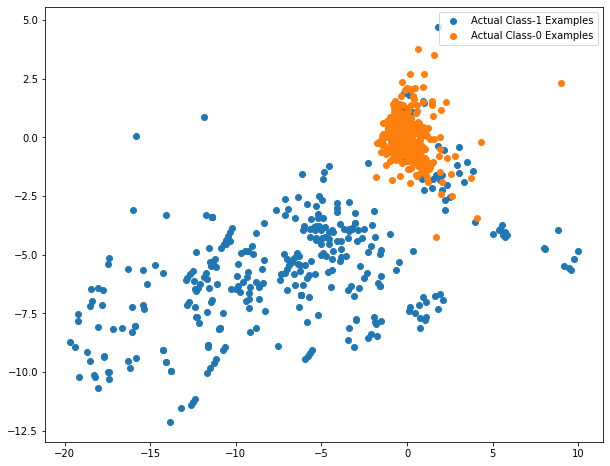

In [108]:
var_imp = []
for i in xgb.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb.feature_importances_)[-2])

X_train_1 = X_train_cv.to_numpy()[np.where(y_train_cv==1.0)]
X_train_0 = X_train_cv.to_numpy()[np.where(y_train_cv==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model Building using below balacing techniques
- SMOTE
- Random Oversampling
- ADASYN


## SMOTE

In [82]:
### Print the class distribution after applying SMOTE 

random.seed(42)
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = sm.fit_resample(X_test, y_test)

# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do

X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

In [39]:
X_train_cv.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.905704,-0.132224,2.177460,0.983439,-0.256850,0.451569,0.193406,0.020018,0.380356,0.124074,-0.510110,-0.775450,-0.999509,-0.405695,1.714369,-0.600799,0.214691,0.008907,0.502474,0.328764,-0.007472,0.367548,-0.191748,0.016718,0.211972,-0.326511,0.323431,-0.053571,1.089182
1,0.626450,0.093264,-0.035991,0.389338,0.029079,0.040131,-0.062226,0.006347,-0.185564,-0.117981,1.524745,1.302582,0.497963,-0.233112,0.677310,0.491697,-0.175464,-0.239714,-0.170709,-0.093984,-0.302689,-0.885462,0.153610,-0.635072,0.288500,0.350336,-0.033378,0.056907,-1.063927
2,-0.743372,-0.203773,1.401404,-0.578840,-0.021651,0.976466,0.191810,0.310383,-1.317899,-0.011882,-0.176170,0.026039,0.516515,-0.382093,-0.718876,-1.193580,-0.825270,2.442768,-1.531269,-0.276219,-0.134826,-0.012854,-0.320524,-1.756515,1.276738,-0.402439,0.145635,0.200530,0.983505
3,-0.598482,0.946635,0.715890,-0.287125,0.678196,0.427097,0.899701,-2.921637,0.598952,1.143067,-0.581070,0.166795,1.747096,-1.351221,0.738087,-0.168338,-1.408246,-0.445047,0.405827,-0.209015,2.577411,-1.383352,0.081729,-1.077600,-0.812858,-0.019330,-2.912062,-3.506940,0.377155
4,-0.712036,0.107017,-0.234674,-0.119584,1.960853,2.376679,0.298148,0.842382,-0.316407,-0.352840,-0.671182,-0.299456,-0.280036,0.002159,-0.407779,-0.319353,-0.619249,0.120612,0.704097,0.066302,-0.085340,-0.387282,-0.342888,1.910140,0.704545,-0.791903,0.018272,0.447556,0.828774


In [83]:
random.seed(42)
sm = SMOTE(random_state=42)
X_train_smote_cv, y_train_smote_cv = sm.fit_resample(X_train_cv, y_train_cv)
X_test_smote_cv, y_test_smote_cv = sm.fit_resample(X_test_cv, y_test_cv)

# Artificial minority samples and correspondingminority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do

X_train_smote_2 = X_train_smote_cv[X_train_cv.shape[0]:]

X_train_cv_1 = X_train_cv.to_numpy()[np.where(y_train_cv==1.0)]
X_train_cv_0 = X_train_cv.to_numpy()[np.where(y_train_cv==0.0)]

In [41]:
X_train_cv_1 = pd.DataFrame(X_train_cv_1,columns = X.columns)
X_train_cv_1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.251402,1.376241,-1.097875,2.474288,-0.387822,-1.191258,-2.041970,1.498825,-2.811796,-2.828943,2.856012,-2.260791,-0.594153,-3.640620,0.386696,-1.271366,-3.039344,-0.042044,0.518216,0.164146,0.728968,-0.068525,-0.758739,0.475344,0.047267,0.453168,0.645895,-0.434365,-2.729112
1,-1.248420,1.219110,-0.396237,1.548755,-0.600026,0.045430,0.452275,-0.450370,-0.169259,-1.485209,1.885132,-3.838258,0.032084,-1.477615,-0.786739,-2.296950,-4.881314,-2.974171,-1.660188,-0.566193,-0.401201,-1.274237,0.271392,-0.242052,-0.336009,-1.193943,0.087715,-0.464965,1.349996
2,-1.869514,0.899854,-1.568622,1.748588,-0.816039,-1.477250,-2.815645,-0.314219,-0.178289,-5.132919,4.202005,-5.229464,0.194010,-5.291640,-0.063332,-6.053928,-11.527932,-5.649994,0.386140,-0.228500,0.804681,0.225984,-0.712844,-0.186660,0.459047,-1.497999,-2.017650,2.531623,0.578327
3,0.663542,2.283687,-2.293807,2.863460,2.681997,-1.122316,1.374331,-0.536165,-1.209656,-2.472650,1.943176,-3.068662,1.459947,-4.847597,-0.418718,3.635059,9.957880,3.855002,-3.434109,0.008776,-0.524250,-0.972593,-1.060101,-2.292957,3.139874,1.163278,-0.035950,0.460888,-1.546602
4,-0.243513,3.285706,-3.135808,3.689455,0.959597,-2.345481,-1.358081,0.231305,-3.225749,-6.598736,5.621015,-4.643737,0.709942,-7.664443,-1.448904,-1.733382,-1.955453,0.928513,-1.651211,0.775576,0.530388,-0.802866,-1.080130,-1.226527,3.407742,1.118428,1.870246,1.506373,-1.546602


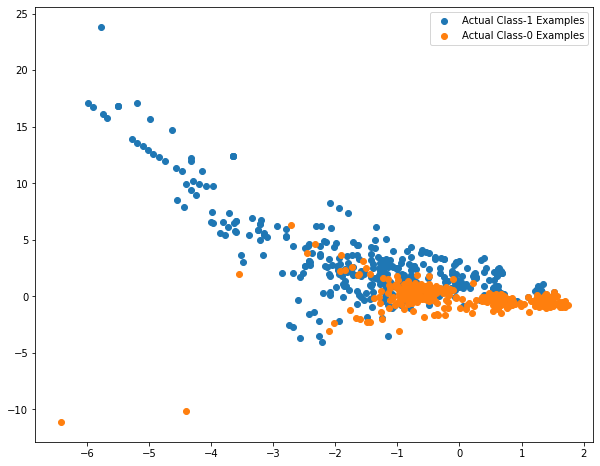

In [42]:
#Actual Class-1 Examples
fig = plt.figure(figsize=[10,8])
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

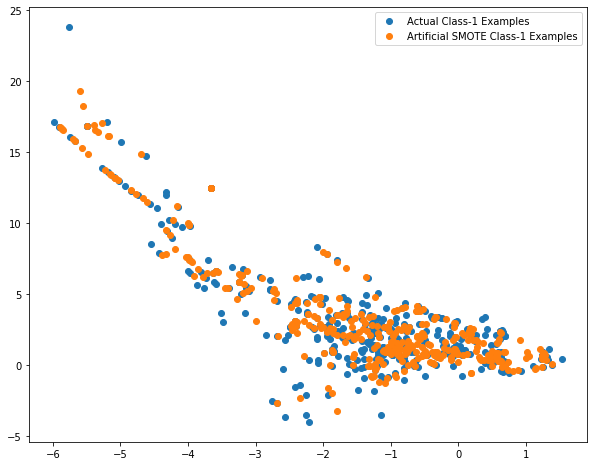

In [43]:
#Artificial SMOTE Class-1 Examples
fig = plt.figure(figsize=[10,8])
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

## GridSearchCV with SMOTE

In [84]:
X_train_smote = pd.DataFrame(data=X_train_smote, columns=X.columns)
X_test_smote = pd.DataFrame(data=X_test_smote, columns=X.columns)
X_train_smote_cv = pd.DataFrame(data=X_train_smote_cv, columns=X.columns)
X_test_smote_cv = pd.DataFrame(data=X_test_smote_cv, columns=X.columns)

## Logistic Regression with SMOTE

In [47]:
# fit model
lr=LogisticRegression(class_weight= 'balanced')
lr.fit(X_train_smote, y_train_smote)

# check score on train data
lr.score(X_train_smote, y_train_smote)

0.9447581439411704

In [48]:
# predict churn on test data
y_pred_smote = lr.predict(X_test_smote)

# create onfusion matrix
cm = confusion_matrix(y_test_smote, y_pred_smote)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_smote, y_pred_smote, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = lr.predict_proba(X_test_smote)[:, 1]
print("ROC-AUC:\t",roc_auc_score(y_test_smote, y_pred_prob))

[[68915  2174]
 [ 5554 65535]]
Sensitivity: 	0.92
Specificity: 	0.97
ROC-AUC:	 0.9832232556800846


In [49]:
# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
model=LogisticRegression()

penalty = ['l1', 'l2']
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
params = dict(C=c_values,penalty=penalty)

# create gridsearch object
model = RandomizedSearchCV(estimator=model, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [50]:
model.fit(X_train_smote_cv,y_train_smote_cv)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   32.1s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
          

In [51]:
print("Best hyperparameters: ", model.best_params_)

Best hyperparameters:  {'penalty': 'l2', 'C': 100}


In [85]:
lr0 = LogisticRegression(C=100.0, penalty='l2',random_state=42,class_weight='balanced')
lr0.fit(X_train_smote_cv,y_train_smote_cv)

LogisticRegression(C=100.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
# predict churn on train data
y_pred_smote = lr0.predict(X_train_smote_cv)

# create onfusion matrix
cm = confusion_matrix(y_train_smote_cv, y_pred_smote)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_smote_cv, y_pred_smote, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = lr0.predict_proba(X_train_smote)[:, 1]
print("AUC:\t", roc_auc_score(y_train_smote, y_pred_prob))

[[207671   5566]
 [ 16727 196510]]
Sensitivity: 	0.92
Specificity: 	0.97
AUC:	 0.9855100280726286


In [88]:
# predict churn on test data
y_pred_smote = lr0.predict(X_test_smote_cv)

# create onfusion matrix
cm = confusion_matrix(y_test_smote_cv, y_pred_smote)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_smote_cv, y_pred_smote, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = lr0.predict_proba(X_test_smote)[:, 1]
print("AUC:\t", roc_auc_score(y_test_smote, y_pred_prob))

[[69184  1894]
 [ 8893 62185]]
Sensitivity: 	0.87
Specificity: 	0.97
AUC:	 0.9912423259975359


## Random Forest with SMOTE

In [45]:
random_forest = RandomForestClassifier(class_weight='balanced', n_jobs = -1)
random_forest.fit(X_train_smote,y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [46]:
y_pred_smote = random_forest.predict(X_test_smote)

# create onfusion matrix
cm = confusion_matrix(y_test_smote, y_pred_smote)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_smote, y_pred_smote, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = random_forest.predict_proba(X_test_smote)[:, 1]

print("AUC-ROC:\t",roc_auc_score(y_test_smote, y_pred_prob))

[[71070    19]
 [ 9078 62011]]
Sensitivity: 	0.87
Specificity: 	1.0
AUC-ROC:	 0.9878682789695982


In [47]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight='balanced', n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest,  param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [50]:
model.fit(X_train_smote_cv, y_train_smote_cv)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 99.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                            

In [51]:
# print best hyperparameters
print("Best hyperparameters: ", model.best_params_)

Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [90]:
# run a random forest model on train data
rf_model = RandomForestClassifier(n_estimators=100, max_features=0.4,criterion = 'entropy', class_weight='balanced', oob_score=True, random_state=4, verbose=1)

In [91]:
rf_model.fit(X_train_smote_cv, y_train_smote_cv)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 10.5min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=0.4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=4, verbose=1,
                       warm_start=False)

In [93]:
# predict churn on train data
y_pred = rf_model.predict(X_train_smote_cv)

# create onfusion matrix
cm = confusion_matrix(y_train_smote_cv, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_smote_cv, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_train_smote_cv)[:, 1]
print("ROC:    \t",roc_auc_score(y_train_smote_cv, y_pred_prob))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.2s finished


[[213237      0]
 [     0 213237]]
Sensitivity: 	1.0
Specificity: 	1.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ROC:    	 1.0


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.1s finished


In [92]:
# predict churn on test data
y_pred = rf_model.predict(X_test_smote_cv)

# create onfusion matrix
cm = confusion_matrix(y_test_smote_cv, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_smote_cv, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test_smote_cv)[:, 1]
print("ROC:    \t",roc_auc_score(y_test_smote_cv, y_pred_prob))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[71063    15]
 [13572 57506]]
Sensitivity: 	0.81
Specificity: 	1.0
ROC:    	 0.9824977362739143


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


## XGBoost with SMOTE

In [55]:
xgboost=XGBClassifier()
xgboost.fit(X_train_smote_cv,y_train_smote_cv)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [56]:
y_pred = xgboost.predict(X_test_smote_cv)

# create onfusion matrix
cm = confusion_matrix(y_test_smote_cv, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_smote_cv, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = xgboost.predict_proba(X_test_smote_cv)[:, 1]
print("AUC-ROC:\t",roc_auc_score(y_test_smote_cv, y_pred_prob))

[[70469   609]
 [ 9470 61608]]
Sensitivity: 	0.87
Specificity: 	0.99
AUC-ROC:	 0.989623472633981


In [57]:
from sklearn.model_selection import RandomizedSearchCV
#XGBoost classifier:
xgbst = XGBClassifier()


param_xgb = {'n_estimators': [130,140,150],
              'max_depth': [3, 5, 7],
               'min_child_weight':[1,2,3]
             } 

clf_xgb_cv = RandomizedSearchCV(xgbst, param_xgb, cv=3,scoring='roc_auc', n_jobs=-1)
clf_xgb_cv.fit(X_train_smote_cv,y_train_smote_cv)

print("tuned hpyerparameters :(best parameters) ",clf_xgb_cv.best_params_)
print("accuracy :",clf_xgb_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'n_estimators': 150, 'min_child_weight': 3, 'max_depth': 7}
accuracy : 0.9998751044813993


In [94]:
xgbsm= XGBClassifier(n_estimators=150,min_child_weight=3,max_depth=7)

xgbsm.fit(X_train_smote_cv, y_train_smote_cv)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=3, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [96]:
# predict churn on train data
y_pred = xgbsm.predict(X_train_smote_cv)

# create onfusion matrix
cm = confusion_matrix(y_train_smote_cv, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_smote_cv, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = xgbsm.predict_proba(X_train_smote_cv)[:, 1]
print("AUC-ROC:\t",roc_auc_score(y_train_smote_cv, y_pred_prob))

[[213205     32]
 [     0 213237]]
Sensitivity: 	1.0
Specificity: 	1.0
AUC-ROC:	 0.9999991515618082


In [95]:
# predict churn on test data
y_pred = xgbsm.predict(X_test_smote_cv)

# create onfusion matrix
cm = confusion_matrix(y_test_smote_cv, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_smote_cv, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = xgbsm.predict_proba(X_test_smote_cv)[:, 1]
print("AUC-ROC:\t",roc_auc_score(y_test_smote_cv, y_pred_prob))

[[71038    40]
 [11821 59257]]
Sensitivity: 	0.83
Specificity: 	1.0
AUC-ROC:	 0.9885486997166533


### Random Oversampling

In [98]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_ros_cv, y_train_ros_cv = ros.fit_resample(X_train_cv, y_train_cv)
X_test_ros_cv, y_test_ros_cv = ros.fit_resample(X_test_cv, y_test_cv)


## Logistic Regression with Random Oversampling

In [78]:
# fit model
lr=LogisticRegression()
lr.fit(X_train_ros_cv, y_train_ros_cv)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
# predict churn on test data
y_pred = lr.predict(X_test_ros_cv)

# create onfusion matrix
cm = confusion_matrix(y_test_ros_cv, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_ros_cv, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = lr.predict_proba(X_test_ros_cv)[:, 1]
print("ROC-AUC:\t",roc_auc_score(y_test_ros_cv, y_pred_prob))

[[69414  1664]
 [ 7461 63617]]
Sensitivity: 	0.9
Specificity: 	0.98
ROC-AUC:	 0.9799057028741658


In [80]:
# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
model=LogisticRegression()

penalty = ['l1', 'l2']
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
params = dict(C=c_values,penalty=penalty)

# create gridsearch object
model = RandomizedSearchCV(estimator=model, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [81]:
model.fit(X_train_ros_cv,y_train_ros_cv)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   25.0s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
          

In [82]:
print("Best hyperparameters: ", model.best_params_)

Best hyperparameters:  {'penalty': 'l2', 'C': 10}


In [65]:
lr0 = LogisticRegression(C=10, penalty='l2',random_state=42,class_weight='balanced')
lr0.fit(X_train_ros_cv,y_train_ros_cv)

LogisticRegression(C=10, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
# predict churn on train data
y_pred_ros = lr0.predict(X_train_ros_cv)

# create onfusion matrix
cm = confusion_matrix(y_train_ros_cv, y_pred_ros)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_ros_cv, y_pred_ros, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = lr0.predict_proba(X_train_ros_cv)[:, 1]
print("AUC:\t", roc_auc_score(y_train_ros_cv, y_pred_prob))

[[208247   4990]
 [ 14928 198309]]
Sensitivity: 	0.93
Specificity: 	0.98
AUC:	 0.9870056769978856


In [67]:
# predict churn on test data
y_pred_ros = lr0.predict(X_test_ros_cv)

# create onfusion matrix
cm = confusion_matrix(y_test_ros_cv, y_pred_ros)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_ros_cv, y_pred_ros, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = lr0.predict_proba(X_test_ros_cv)[:, 1]
print("AUC:\t", roc_auc_score(y_test_ros_cv, y_pred_prob))

[[69414  1664]
 [ 7461 63617]]
Sensitivity: 	0.9
Specificity: 	0.98
AUC:	 0.979908712920271


## Random Forest with Random Oversampling

In [31]:
random_forest = RandomForestClassifier( n_jobs = -1)
random_forest.fit(X_train_ros_cv,y_train_ros_cv)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [32]:
y_pred = random_forest.predict(X_test_ros_cv)

# create onfusion matrix
cm = confusion_matrix(y_test_ros_cv, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_ros_cv, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = random_forest.predict_proba(X_test_ros_cv)[:, 1]

print("AUC-ROC:\t",roc_auc_score(y_test_ros_cv, y_pred_prob))

[[71074     4]
 [16157 54921]]
Sensitivity: 	0.77
Specificity: 	1.0
AUC-ROC:	 0.9370436986747899


In [33]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier( n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest,  param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [34]:
model.fit(X_train_ros_cv, y_train_ros_cv)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 48.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              rand

In [35]:
# print best hyperparameters
print("Best hyperparameters: ", model.best_params_)

Best hyperparameters:  {'criterion': 'gini', 'max_features': 'auto'}


In [36]:
# run a random forest model on train data
rf_model = RandomForestClassifier(n_estimators=100, max_features='auto',criterion = 'gini', class_weight='balanced', oob_score=True, random_state=4, verbose=1)

In [37]:
rf_model.fit(X_train_ros_cv, y_train_ros_cv)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.4min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=4, verbose=1,
                       warm_start=False)

In [39]:
# predict churn on train data
y_pred = rf_model.predict(X_train_ros_cv)

# create onfusion matrix
cm = confusion_matrix(y_train_ros_cv, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_ros_cv, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_train_ros_cv)[:, 1]
print("ROC:    \t",roc_auc_score(y_train_ros_cv, y_pred_prob))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.5s finished


[[213237      0]
 [     0 213237]]
Sensitivity: 	1.0
Specificity: 	1.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ROC:    	 1.0


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.6s finished


In [38]:
# predict churn on test data
y_pred = rf_model.predict(X_test_ros_cv)

# create onfusion matrix
cm = confusion_matrix(y_test_ros_cv, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_ros_cv, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test_ros_cv)[:, 1]
print("ROC:    \t",roc_auc_score(y_test_ros_cv, y_pred_prob))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[71073     5]
 [17980 53098]]
Sensitivity: 	0.75
Specificity: 	1.0
ROC:    	 0.9490669971861843


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


## XGBoost with Random Oversampling

In [43]:
xgboost=XGBClassifier()
xgboost.fit(X_train_ros_cv,y_train_ros_cv)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [44]:
y_pred = xgboost.predict(X_test_ros_cv)

# create onfusion matrix
cm = confusion_matrix(y_test_ros_cv, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_ros_cv, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = xgboost.predict_proba(X_test_ros_cv)[:, 1]
print("AUC-ROC:\t",roc_auc_score(y_test_ros_cv, y_pred_prob))

[[70774   304]
 [10418 60660]]
Sensitivity: 	0.85
Specificity: 	1.0
AUC-ROC:	 0.9822314035070219


In [45]:
from sklearn.model_selection import RandomizedSearchCV
#XGBoost classifier:
xgbst = XGBClassifier()


param_xgb = {'n_estimators': [130,140,150],
              'max_depth': [3, 5, 7],
               'min_child_weight':[1,2,3]
             } 

clf_xgb_cv = RandomizedSearchCV(xgbst, param_xgb, cv=3,scoring='roc_auc', n_jobs=-1)
clf_xgb_cv.fit(X_train_ros_cv,y_train_ros_cv)

print("tuned hpyerparameters :(best parameters) ",clf_xgb_cv.best_params_)
print("accuracy :",clf_xgb_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'n_estimators': 150, 'min_child_weight': 1, 'max_depth': 5}
accuracy : 0.9998941747618811


In [46]:
print("tuned hpyerparameters :(best parameters) ",clf_xgb_cv.best_params_)
print("AUC-ROC :",clf_xgb_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'n_estimators': 150, 'min_child_weight': 1, 'max_depth': 5}
AUC-ROC : 0.9998941747618811


In [99]:
xgbros= XGBClassifier(n_estimators=150,min_child_weight=1,max_depth=5)
xgbros.fit(X_train_ros_cv, y_train_ros_cv)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [100]:
# predict churn on train data
y_pred = xgbros.predict(X_train_ros_cv)

# create onfusion matrix
cm = confusion_matrix(y_train_ros_cv, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_ros_cv, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = xgbros.predict_proba(X_train_ros_cv)[:, 1]
print("AUC-ROC:\t",roc_auc_score(y_train_ros_cv, y_pred_prob))

[[213193     44]
 [     0 213237]]
Sensitivity: 	1.0
Specificity: 	1.0
AUC-ROC:	 0.9999970259743575


In [101]:
# predict churn on test data
y_pred = xgbros.predict(X_test_ros_cv)

# create onfusion matrix
cm = confusion_matrix(y_test_ros_cv, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_ros_cv, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = xgbros.predict_proba(X_test_ros_cv)[:, 1]
print("AUC-ROC:\t",roc_auc_score(y_test_ros_cv, y_pred_prob))

[[71056    22]
 [13255 57823]]
Sensitivity: 	0.81
Specificity: 	1.0
AUC-ROC:	 0.9774148988272852


## ADASYN
### Print the class distribution after applying ADASYN

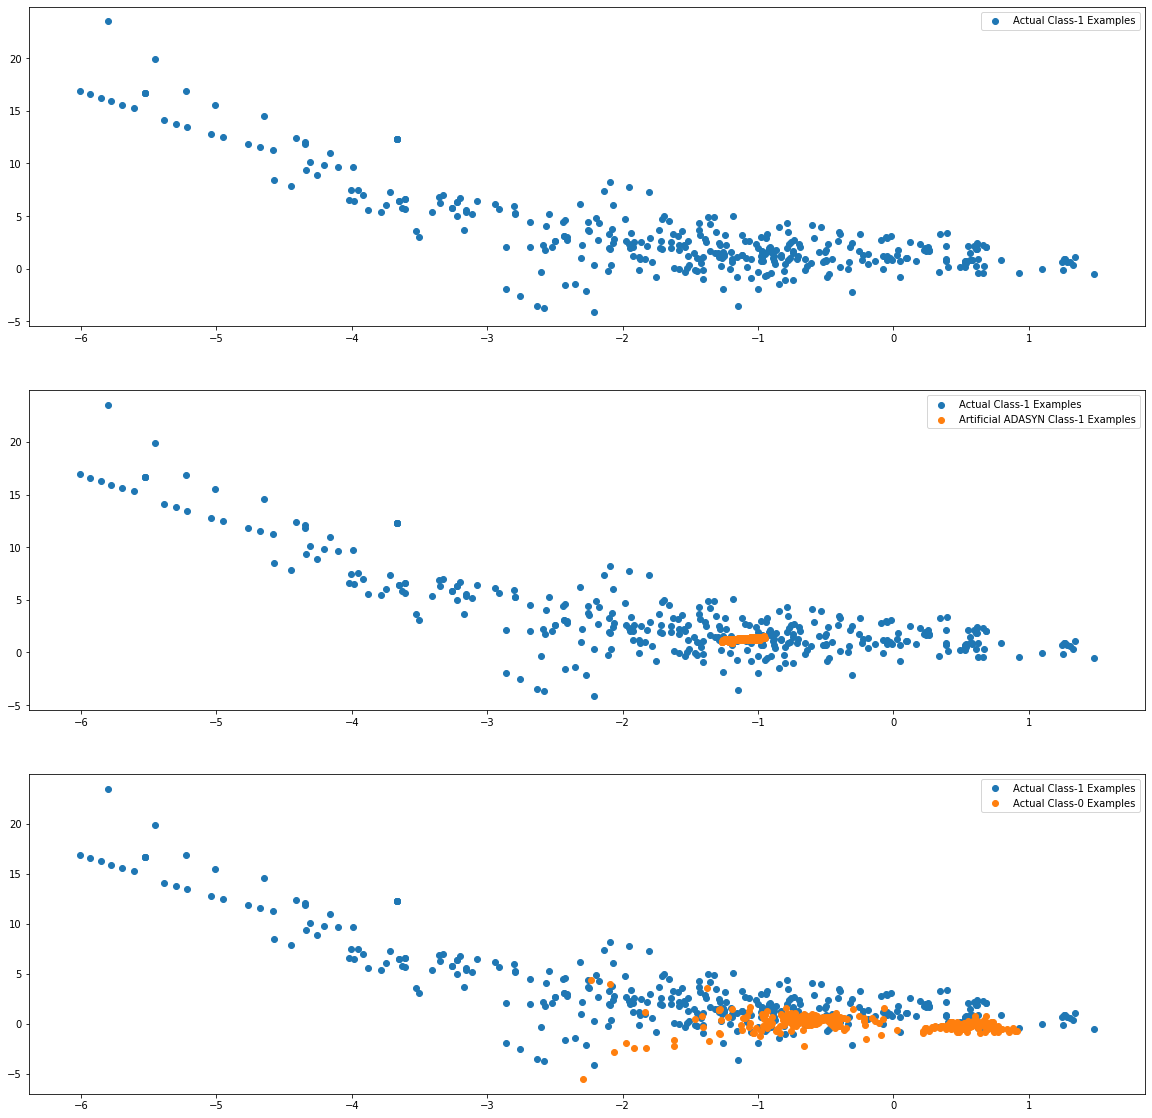

In [51]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=42)
X_train_adasyn_cv, y_train_adasyn_cv = ada.fit_resample(X_train_cv, y_train_cv)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn_cv[X_train_cv.shape[0]:]

X_train_1 = X_train_cv.to_numpy()[np.where(y_train_cv==1.0)]
X_train_0 = X_train_cv.to_numpy()[np.where(y_train_cv==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [24]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(sampling_strategy='auto', random_state=42)
X_train_adasyn_cv, y_train_adasyn_cv = ada.fit_resample(X_train_cv, y_train_cv)
X_test_adasyn_cv, y_test_adasyn_cv = ada.fit_resample(X_test_cv, y_test_cv)

## Logistic Regression with ADASYN

In [57]:
# fit model
lr=LogisticRegression()
lr.fit(X_train_adasyn_cv, y_train_adasyn_cv)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
# predict churn on test data
y_pred = lr.predict(X_test_adasyn_cv)

# create onfusion matrix
cm = confusion_matrix(y_test_adasyn_cv, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_adasyn_cv, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = lr.predict_proba(X_test_adasyn_cv)[:, 1]
print("ROC-AUC:\t",roc_auc_score(y_test_adasyn_cv, y_pred_prob))

[[64745  6333]
 [13253 57842]]
Sensitivity: 	0.81
Specificity: 	0.91
ROC-AUC:	 0.9454287655911706


In [59]:
# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
model=LogisticRegression()

penalty = ['l1', 'l2']
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
params = dict(C=c_values,penalty=penalty)

# create gridsearch object
model = RandomizedSearchCV(estimator=model, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [60]:
model.fit(X_train_adasyn_cv,y_train_adasyn_cv)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:   33.7s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   33.9s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
          

In [61]:
print("Best hyperparameters: ", model.best_params_)

Best hyperparameters:  {'penalty': 'l2', 'C': 0.1}


In [62]:
lr0 = LogisticRegression(C=.1, penalty='l2',random_state=42,class_weight='balanced')
lr0.fit(X_train_ros_cv,y_train_ros_cv)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
# predict churn on train data
y_pred_adasyn = lr0.predict(X_train_adasyn_cv)

# create onfusion matrix
cm = confusion_matrix(y_train_adasyn_cv, y_pred_adasyn)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_adasyn_cv, y_pred_adasyn, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = lr0.predict_proba(X_train_adasyn_cv)[:, 1]
print("AUC:\t", roc_auc_score(y_train_adasyn_cv, y_pred_prob))

[[208262   4975]
 [ 70372 142882]]
Sensitivity: 	0.67
Specificity: 	0.98
AUC:	 0.9571054347788481


In [64]:
# predict churn on test data
y_pred_adasyn = lr0.predict(X_test_adasyn_cv)

# create onfusion matrix
cm = confusion_matrix(y_test_adasyn_cv, y_pred_adasyn)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_adasyn_cv, y_pred_adasyn, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = lr0.predict_proba(X_test_adasyn_cv)[:, 1]
print("AUC:\t", roc_auc_score(y_test_adasyn_cv, y_pred_prob))

[[69416  1662]
 [26117 44978]]
Sensitivity: 	0.63
Specificity: 	0.98
AUC:	 0.9431520230993413


## Random Forest with ADASYN

In [25]:
random_forest = RandomForestClassifier( n_jobs = -1)
random_forest.fit(X_train_adasyn_cv,y_train_adasyn_cv)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [26]:
y_pred = random_forest.predict(X_test_adasyn_cv)

# create onfusion matrix
cm = confusion_matrix(y_test_adasyn_cv, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_adasyn_cv, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = random_forest.predict_proba(X_test_adasyn_cv)[:, 1]

print("AUC-ROC:\t",roc_auc_score(y_test_adasyn_cv, y_pred_prob))

[[71066    12]
 [37915 33180]]
Sensitivity: 	0.47
Specificity: 	1.0
AUC-ROC:	 0.944646033118053


In [29]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier( n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest,  param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [30]:
model.fit(X_train_adasyn_cv, y_train_adasyn_cv)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 108.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              rand

In [31]:
# print best hyperparameters
print("Best hyperparameters: ", model.best_params_)

Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [34]:
# run a random forest model on train data
rf_model = RandomForestClassifier(n_estimators=100, max_features=0.4,criterion = 'entropy', class_weight='balanced', oob_score=True, random_state=4, verbose=1)

In [37]:
rf_model.fit(X_train_adasyn_cv, y_train_adasyn_cv)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 13.7min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=0.4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=4, verbose=1,
                       warm_start=False)

In [38]:
# predict churn on train data
y_pred = rf_model.predict(X_train_adasyn_cv)

# create onfusion matrix
cm = confusion_matrix(y_train_adasyn_cv, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_adasyn_cv, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_train_adasyn_cv)[:, 1]
print("ROC:    \t",roc_auc_score(y_train_adasyn_cv, y_pred_prob))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.3s finished


[[213237      0]
 [     0 213254]]
Sensitivity: 	1.0
Specificity: 	1.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ROC:    	 1.0


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.3s finished


In [39]:
# predict churn on test data
y_pred = rf_model.predict(X_test_adasyn_cv)

# create onfusion matrix
cm = confusion_matrix(y_test_adasyn_cv, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_adasyn_cv, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test_adasyn_cv)[:, 1]
print("ROC:    \t",roc_auc_score(y_test_adasyn_cv, y_pred_prob))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[71062    16]
 [38705 32390]]
Sensitivity: 	0.46
Specificity: 	1.0
ROC:    	 0.9454314243538599


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


## XGBoost with ADASYN

In [43]:
xgboost=XGBClassifier()
xgboost.fit(X_train_adasyn_cv,y_train_adasyn_cv)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [44]:
y_pred = xgboost.predict(X_test_adasyn_cv)

# create onfusion matrix
cm = confusion_matrix(y_test_adasyn_cv, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_adasyn_cv, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = xgboost.predict_proba(X_test_adasyn_cv)[:, 1]
print("AUC-ROC:\t",roc_auc_score(y_test_adasyn_cv, y_pred_prob))

[[69094  1984]
 [17858 53237]]
Sensitivity: 	0.75
Specificity: 	0.97
AUC-ROC:	 0.9640182574624678


In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from scipy.stats import randint
#XGBoost classifier:
xgbst = XGBClassifier()


param_xgb = {'n_estimators': [140,150,160],
              'max_depth': [1,3, 5, 7],
               'min_child_weight':[1,2,3]
             } 

    
ad_xgb_cv = RandomizedSearchCV(xgbst, param_xgb,cv = 3,scoring='roc_auc', n_jobs=-1)
ad_xgb_cv.fit(X_train_adasyn_cv,y_train_adasyn_cv)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='de

In [46]:
print("tuned hpyerparameters :(best parameters) ",ad_xgb_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'n_estimators': 150, 'min_child_weight': 2, 'max_depth': 5}


In [47]:
model= XGBClassifier(max_depth= 5, min_child_weight= 2, n_estimators= 150)

model.fit(X_train_adasyn_cv, y_train_adasyn_cv)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=2, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [49]:
# predict churn on train data
y_pred = model.predict(X_train_adasyn_cv)

# create onfusion matrix
cm = confusion_matrix(y_train_adasyn_cv, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_adasyn_cv, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_train_adasyn_cv)[:, 1]
print("AUC-ROC:\t",roc_auc_score(y_train_adasyn_cv, y_pred_prob))

[[212648    589]
 [     0 213254]]
Sensitivity: 	1.0
Specificity: 	1.0
AUC-ROC:	 0.9999679837286478


In [51]:
# predict churn on test data
y_pred = model.predict(X_test_adasyn_cv)

# create onfusion matrix
cm = confusion_matrix(y_test_adasyn_cv, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_adasyn_cv, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test_adasyn_cv)[:, 1]
print("AUC-ROC:\t",roc_auc_score(y_test_adasyn_cv, y_pred_prob))

[[70833   245]
 [26890 44205]]
Sensitivity: 	0.62
Specificity: 	1.0
AUC-ROC:	 0.9645970876429404


## Summary - (basis the model results)

- Best Model - XGBoost
- Best Balancing Technique - SMOTE

## Important features of the best model to understand the dataset(Balanced Data)

Top var = 14
2nd Top var = 4
3rd Top var = 8


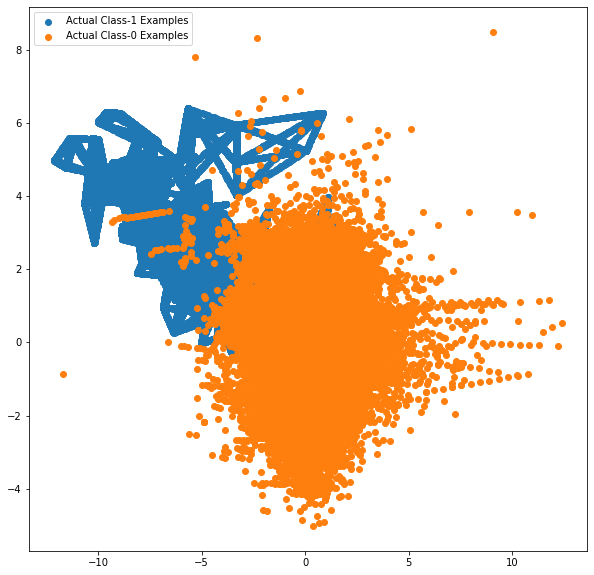

In [106]:
var_imp = []
for i in xgbsm.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgbsm.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgbsm.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgbsm.feature_importances_)[-3])+1)

top_var_index = var_imp.index(np.sort(xgbsm.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgbsm.feature_importances_)[-2])

X_train_1 = X_train_smote_cv.to_numpy()[np.where(y_train_smote_cv==1.0)]
X_train_0 = X_train_smote_cv.to_numpy()[np.where(y_train_smote_cv==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### Recommendation to Business
- We would recommend using XGBoost as the Machine Learning Model along with SMOTE as the balancing technique.
- This would help the bank to predict the fradulent transactions, leading to prevention of losses due the fradulent transactions.